# **MLP from scratch for MNIST classification**

In this demo, we will see how to build a Multi-layered perceptron (Feed Forward Neural Network or FFNN) from scratch.

# Importing the basic libaries -

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

# **Loading the Data-**

We will be using MNIST Dataset for the classification problem. MNIST dataset contains grayscale images of handwritten digits of the size 28*28. We will be building a neural network to classify these images.

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Source- http://yann.lecun.com/exdb/mnist/

In [1]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'Train: X - {X_train.shape}, y - {Y_train.shape}')
print(f'Test: X - {X_test.shape}, y - {Y_test.shape}')

2024-10-19 16:55:32.611586: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-19 16:55:32.870002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 16:55:32.988560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 16:55:33.018825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-19 16:55:33.180680: I tensorflow/core/platform/cpu_feature_guar

Train: X - (60000, 28, 28), y - (60000,)
Test: X - (10000, 28, 28), y - (10000,)


#### Displaying an image from the dataset

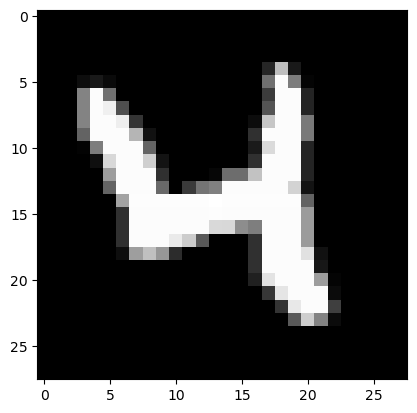



Label in dataset: 4


In [3]:
plt.imshow(X_train[20],cmap='gray')
plt.show()
print(f"\n\nLabel in dataset: {Y_train[20]}")

In [4]:
digits = np.unique(Y_train)
print(digits)

[0 1 2 3 4 5 6 7 8 9]


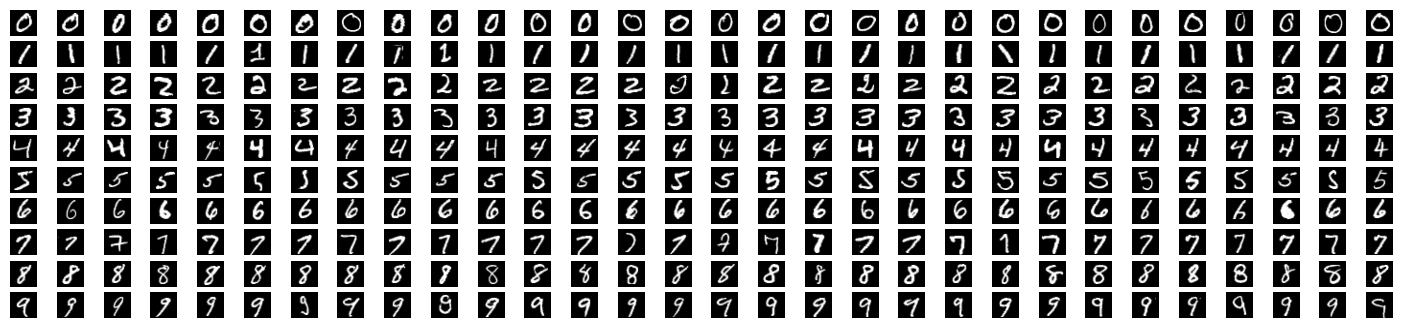

In [5]:
M = 30 # no of instances for each class
fig, axs = plt.subplots(len(digits), M, figsize=(18,4))
for i,d in enumerate(digits):
    for j in range(M):
        axs[i,j].imshow(X_train[Y_train==d][j], cmap='gray')
        axs[i,j].axis('off')

In [6]:
#Displaying the contents of 21th image (the choice of index 20 is random here)
X_train[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  

As you can see here, each image is a (28x28) 2d numpy array and hence contains 784 individual pixel values (in grayscale).

In [7]:
#displaying the contents of Y_train for 21st image
Y_train[20]

4

In [8]:
#counts for all unique class labels
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


In [9]:
# flattening single example
example = X_train[40].reshape((-1))
print(type(example))
print("Shape:", example.shape)

<class 'numpy.ndarray'>
Shape: (784,)


# **Pre-processing:**

**Flattening the input values-** Because we are using a simple FFNN, it would be better to convert all the input images of size ${28*28}$ to a size of ${784*1}$ i.e to convert each input from a 2D array to a 1D array.

In [10]:
# flattening the input

X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

print(f"Shapes - Train: {X_train_flattened.shape}, Test: {X_test_flattened.shape}")

Shapes - Train: (60000, 784), Test: (10000, 784)


**Normalizing input values:**

We often need to normalize the input values into a convinient range. Let us see what is the current range of pixel values:

In [11]:
print("Minimum pixel value =", X_train_flattened.min())
print("Maximum pixel value =", X_train_flattened.max())

Minimum pixel value = 0
Maximum pixel value = 255


As the pixel values lies between the range 0 and 255, we want to normalize the input such that values of the pixels lies in the range (0,1). So, to normalize, we will divide each input values by the maximum pixel value which in this case is 255.

**Normalizing the dataset:**

In [12]:
X_normalized_train = np.round(X_train_flattened/X_train_flattened.max(), 3)
X_normalized_test = np.round(X_test_flattened/X_test_flattened.max(), 3)
#print the new values
print("Minimum pixel value =", X_normalized_train.min())
print("Maximum pixel value =", X_normalized_train.max())

Minimum pixel value = 0.0
Maximum pixel value = 1.0


In [13]:
X_normalized_train[20]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

**Normalized and flattened data can still be visaulized just like original data-**

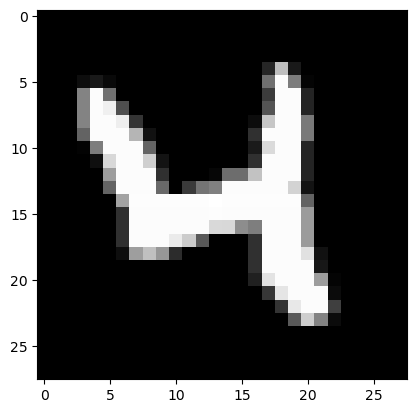

In [14]:
# normalized and flattened data can still be visualized as original data
plt.imshow(X_normalized_train[20].reshape(28,28), cmap='gray')
plt.show()

So, we can see that normalizing does not effect the nature of data. So, we will use this normalized and flattened layer as the input to our neural network.

# **Creating datasets for binary and multiclass classification-**

## **Binary Classification problem-**

MNIST dataset has 10 different target classes, each representing one of the digits from 0-9. Let's consider digits '**0**' and '**1**' for binary classification. We will take only these inputs from the original dataset-

**Creating the dataset-**

In [15]:
#for train data
train_idx = np.where((Y_train==0) | (Y_train==1))# Here we get the index of values 0 and 1
X_train_bin = X_normalized_train[train_idx]
Y_train_bin = Y_train[train_idx]

#for test data
test_idx = np.where((Y_test==0) | (Y_test==1))
X_test_bin = X_normalized_test[test_idx]
Y_test_bin = Y_test[test_idx]

print(f'Trainset shapes - X: {X_train_bin.shape}, Y: {Y_train_bin.shape}')
print(f'Testset shapes - X: {X_test_bin.shape}, Y: {Y_test_bin.shape}')

print(f'\nTrain statistics - 0: {(Y_train_bin==0).sum()}, 1: {(Y_train_bin==1).sum()}')
print(f'Test statistics - 0: {(Y_test_bin==0).sum()}, 1: {(Y_test_bin==1).sum()}')


Trainset shapes - X: (12665, 784), Y: (12665,)
Testset shapes - X: (2115, 784), Y: (2115,)

Train statistics - 0: 5923, 1: 6742
Test statistics - 0: 980, 1: 1135


We now have only 0's and 1's in the newly created subset of the dataset. As we can see that count of 0's and 1's is quite even. So, the dataset is quite evenly balanced.

**Splitting the training dataset-**

Often it is observed that training a model for a large number of epochs leads to the model overfitting very much to the training data set. To tackle this issue, we need a validation dataset to keep track of the 'validation performance'. So, we will now split the current training dataset (of 11344 instances) into a training set and validation set.

In [2]:
from sklearn.model_selection import train_test_split # type: ignore

We can use this library to split our data.

In general, a split of 90-10, 80-20, 67-33 etc. is used. You can choose your own value as it is always a tradeoff.

We will go with 80-20 split.

In [ ]:
X_train_bin, X_val_bin, Y_train_bin, Y_val_bin = train_test_split(X_train_bin, Y_train_bin, test_size=0.2, random_state = 28)

In [ ]:
print("Instances in new train-set:", len(Y_train_bin))
print("Instances in val-set:", len(Y_val_bin))
print("\nCount of 0s and 1s in train-set:", (Y_train_bin==0).sum(), (Y_train_bin==1).sum())
print("Count of 0s and 1s in val-set:", (Y_val_bin==0).sum(), (Y_val_bin==1).sum())

In [ ]:
# Transpose feature matrices as per our model requirement

X_train_bin, X_val_bin, X_test_bin = X_train_bin.T, X_val_bin.T, X_test_bin.T
print(f'Shapes - {X_train_bin.shape, X_val_bin.shape, X_test_bin.shape}')

# **Building the Neural Net class:**

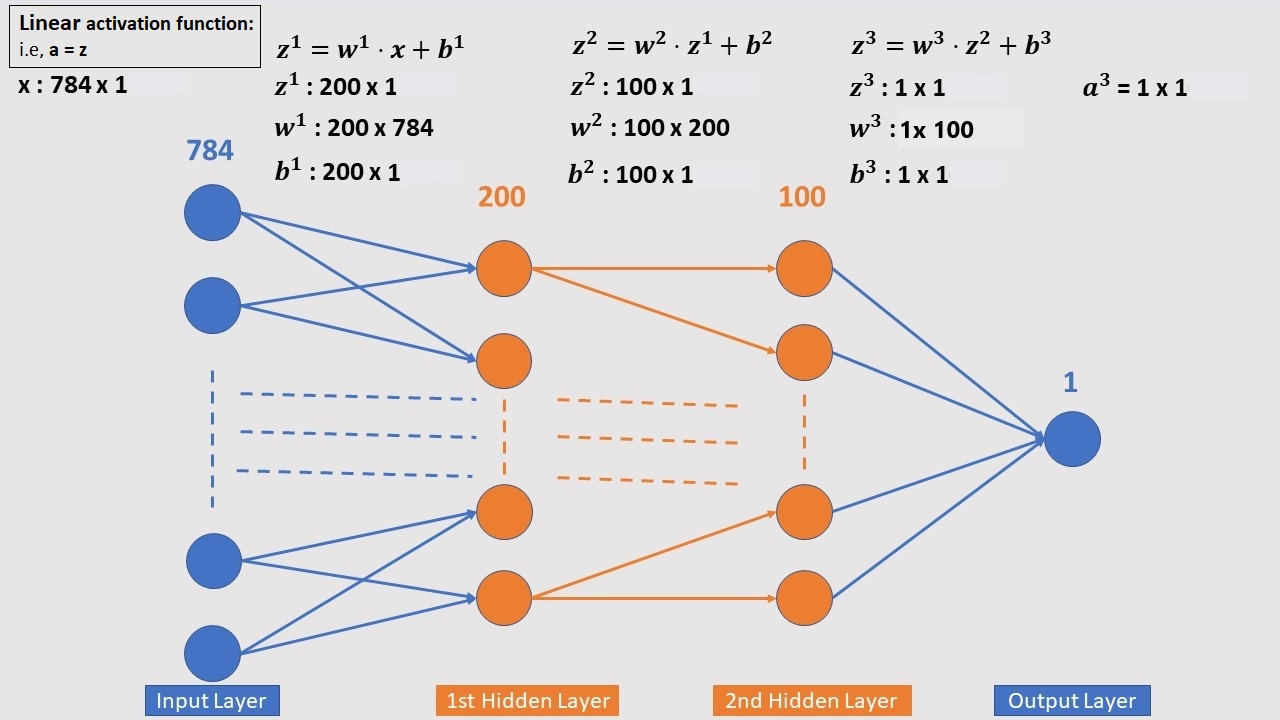


\begin{equation}
    \mathbf{W}
    =
    \begin{bmatrix}
        W^{1} & W^{2}  & W^{3} \\
    \end{bmatrix}
\end{equation}

where, $ \\ $


\begin{equation}
    \mathbf{W^{l}} =
    \begin{bmatrix}
        w_{11} & w_{12} & w_{13} & \dots & w_{1N_{l-1}} \\
        w_{21} & w_{22} & w_{23} & \dots & w_{2N_{l-1}} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        w_{N_{l}1} & w_{N_{l}2} & w_{N_{l}3} & \dots & w_{N_{l}N_{l-1}} \\
    \end{bmatrix}
\end{equation}


Equation:

m : Total number of samples

For input X:


\begin{equation}
    \mathbf{Z^{1}} = \mathbf{W^{1}}\ \mathbf{X} + \mathbf{b^{1}}
\end{equation}

\begin{equation}
    \mathbf{Z^{1}} = \mathbf{W^{1}}
    \begin{bmatrix}
    | & | & \dots & | \\
    \mathbf{X}[1] & \mathbf{X}[2] & \dots & \mathbf{X}[m] \\
    | & | & \dots & |
    \end{bmatrix} +  \begin{bmatrix}
        | & | & \dots & | \\
        \mathbf{b^{1}} & \mathbf{b^{1}} & \dots & \mathbf{b^{1}}\\
        | & | & \dots & |
    \end{bmatrix}
\end{equation}

# **Equations of Backpropagation-**

**Recall:** $W^\ell$ represents the matrix of weights connecting layer $\ell − 1$ to
layer $\ell$.

**Recall:** $δ^\ell$ represents the error gradients with respect to the activations at the layer $\ell$.



# Gradients at the output layer:  

Now, the gradient with respect to weights for output layer would be-

# $\frac{\partial e}{\partial w_{i j}^{L}}=\frac{\partial e}{\partial z_i^{L}} a_j^{L-1}=\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right) a_j^{L-1}$

Collecting these partial derivatives into a matrix we get:

# $\nabla_{W^L} e= \operatorname{Diag}\left({\phi^L}'\right) \delta^L (a^{L-1})^\top$

where

$\delta^L = \begin{bmatrix} \frac{\partial e}{\partial a_1^{L}} \ldots \frac{\partial e}{\partial a_{N_L}^{L}} \end{bmatrix}^\top$.

In code, we have used an equivalent way to represent this:

# $\nabla_{W^L} e=\operatorname{Diag}\left({\phi^L}'\right) \delta^L (a^{L-1})^\top =: \delta^L_z (a^{L-1})^\top$.



Similarly, the gradient with respect to bias at output layer would be-

# $\frac{\partial e}{\partial b_{i}^{L}}=\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right)$

Now, these gradients can be collected into a vector:

# $\nabla_{b^L} e= \operatorname{Diag}\left( \phi^{L'} \right) \delta^L =: \delta_z^L$.



# Gradient in the hidden layer:

The gradient with respect to weights for hidden layers would be-

# $\nabla_{W^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}\left(a^{\ell-1}\right)^{\top}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L\left(a^{\ell-1}\right)^{\top}$

$\text { where } V^{\ell+1}=\left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \text {. }$

In code, we have used an equivalent way to represent this:

$\nabla_{W^{\ell}} e = \operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}\left(a^{\ell-1}\right)^{\top} \\
=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \ldots \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L\left(a^{\ell-1}\right)^{\top}$.

For the second last layer, we have:

$\nabla_{W^{L-1}} e = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \delta^{L-1}\left(a^{L-2}\right)^{\top} \\
=\operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L\left(a^{L-2}\right)^{\top}\\
= \delta_z^{L-1} \left(a^{L-2}\right)^{\top}
$

where

$\delta_z^{L-1} = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \delta_z^{L}$.


Similarly, for the third last layer we have:

$\nabla_{W^{L-2}} e = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top} \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{{L}^{\prime}}\right) \delta^{L}\left(a^{L-3}\right)^{\top} \\
= \delta_z^{L-2} \left(a^{L-3}\right)^{\top}
$

where

$\delta_z^{L-2} = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top}  \delta_z^{L-1}$.



And the gradient with respect to bias at hidden layers would be-

# $\nabla_{b^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L$.

In code, we have used an equivalent way to represent this:

$\nabla_{b^{\ell}} e = \operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell} \\
=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \ldots \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L.$

For the second last layer, we have:

$\nabla_{b^{L-1}} e = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L = \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \delta^{L}_z = \delta^{L-1}_z$.


For the third last layer, we have:

$\nabla_{b^{L-2}} e = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top} \operatorname{Diag}\left(\phi^{{L-1}^{\prime}}\right) \left(W^{L}\right)^{\top} \operatorname{Diag}\left(\phi^{L^{\prime}}\right) \delta^L = \operatorname{Diag}\left(\phi^{{L-2}^{\prime}}\right) \left(W^{L-1}\right)^{\top} \delta^{L-1}_z = \delta^{L-2}_z$.


In [ ]:
class Neural_Network():
    def __init__(self, neurons, Activations, initialization='randn'):
        """Define the NN design parameters
        Args:
            neurons (int array): list of number of neurons in each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """

        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer
        self.layer_activations = [] # activations for each layer

        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
           raise ValueError("initialization must be 'rand' or 'randn' or 'he' or 'xavier'")
        for i in range(len(neurons)-1):
            self.weights.append(self.initializer(neurons[i+1],neurons[i])) # weight matrix between layer i and layer i+1
            self.biases.append(self.initializer(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) # activations for each layer


    def sigmoid(self, z):
        """returns result of the sigmoid activation function on input z."""
        ### TODO: implement logistic sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def sigmoidPrime(self,z):
        """returns derivative of sigmoid activation function applied on input z."""
        ### TODO: implement derivative of logistic sigmoid function
        sigmoid_value = self.sigmoid(z)
        return sigmoid_value * (1 - sigmoid_value)


    def tanh(self, z):  #transforms values to -1 to 1
        ### TODO: implement tanh sigmoid activation function
        positive_exp = np.exp(z)
        negative_exp = np.exp(-z)
        return (positive_exp - negative_exp) / (positive_exp + negative_exp)


    def tanhPrime(self,x):
        """returns derivative of hyperbolic tan activation function applied on input z."""
        ### TODO: implement derivative of tanh sigmoid activation function
        tanh_value = self.tanh(z)
        return 1 - np.square(tanh_value)

    def linear(self, z):
        """returns result of the linear activation function on input z."""
        ### TODO: implement linear activation function
        pass

    def linearPrime(self,z):
        """returns derivative of linear activation function applied on input z."""
        ### TODO: implement derivative of linear activation function
        pass

    def ReLU(self,z):
        """returns result of the ReLU activation function on input z."""
        ### TODO: implement ReLU activation function
        return max(z, 0)

    def ReLUPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        ### TODO: implement derivative of ReLU activation function
        pass

    def softmax(self, z):
        """returns result of the softmax activation function on input z."""
        ### TODO: implement softmax function
        exp = np.exp(-z)
        return exp / np.sum(exp)

    def lossSE(self, predicted, actual):
        """Implementation of Squared-error loss function."""
        ### TODO: implement squared error loss function
        pass

    def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        ### TODO: implement cross-entropy loss function
        pass



    def forward(self, x):
        """Defines forward pass of the NN

        Args:
            x (array): input of size self.inputSize

        Returns:
            a (array): output of the forward pass
            layer_dot_prod_z (list): layerwise intermediate outputs
            layer_activations_a (list): layerwise activations
        """

        layer_activations_a = [x] # store the outputs of activation
        a=x  ## storing input as activation of zero-th layer
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]

            ### TODO: implement the computation of z
            ## z = ???

            # print(z.shape)
            if self.layer_activations[i].lower()=='sigmoid':
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower()=='relu':
                a = self.ReLU(z)
            elif self.layer_activations[i].lower()=='tanh':
                a = self.tanh(z)
            elif self.layer_activations[i].lower()=='linear':
                a = self.linear(z)
            elif self.layer_activations[i].lower()=='softmax':
                a = self.softmax(z)
            layer_dot_prod_z.append(z)
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a

    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """

        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        #### TODO: implement backpropagation for computation of gradients

        return (grad_b, grad_w)

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients

        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """

        grad_b, grad_w = grads[0], grads[1]

        ### TODO: implement updation of bias and weight parameters
        pass



    def error(self, X, Y, errors):
        """Appends loss to error list"""
        y = np.squeeze(self.forward(X)[0])
        errors.append(self.loss(y, Y))

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)

    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None,
              n_classes=10, onehotencoded=False, loss_func='SE', Xval=None, Yval=None, verbose=True):
        """Function for training our Neural Network

        Args:
            X (ndarray): feature matrix of training data,
             Shape: (n,m) where n is no. of features and m is no. of samples.
            Y (ndarray): ground truth of training data, NOT one-hot-encoded. Shape: (1,m).
            lr (float or function, optional): constant learning rate or scheduler function.
             Defaults to 1e-3 constant lr.
            max_epochs (int, optional): epoch cap for training. Defaults to 1000.
            patience (int, optional): patience parameter for early stopping. Defaults to 5.
            batch_size (int, optional): mini-batch size. Defaults to full-batch GD if not provided.
            n_classes (int, optional): no. of classes for multi-class classification required if
            one-hot encoding is set to True. Defaults to 10.
            onehotencoded (bool, optional): Defaults to False.
            loss_func (str, optional): Choose from 'SE' and 'CE' loss functions. Defaults to 'SE'.
            Xval (ndarray, optional): Validation data feature matrix. Defaults to None.
            Yval (ndarray, optional): Validation data ground truth. Defaults to None.
            verbose (bool, optional): If True, displays logs and progress of training. Defaults to True.

        Returns:
            [list/tuple]: lists of train-set and validation-set losses seen over the traning process.
        """

        if onehotencoded:
            # a method for creating one hot encoded labels
            def onehotencoding(Y, n):
                # one-hot encoding of class i is just the ith column of the identity
                # matrix of size n where n is the total number of classes. so below
                # code uses Y (a 1d array) for indexing into the identity matrix.

                ### TODO: return one-hot encoding for Y
                pass

            Y = onehotencoding(Y, n_classes)
            if Yval is not None:
                Yval = onehotencoding(Yval, n_classes)

        # Below code ensures that Y is 2-dimensional even when one-hot encoding is not
        # performed, so our same code works for training NN for both tasks.
        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval

        if loss_func == 'SE':
            self.loss = self.lossSE
        elif loss_func == 'CE':
            self.loss = self.lossCE

        train_errors=[]
        if Xval is not None:
            val_errors=[]
        i, j, v = 0, 0, np.inf     ## i -> epoch, j->patience, v ->best loss
        best_params = self.copy_params()

        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:   ## if batch_size is not given
            batch_size = len(X[0])

        #LR control function

        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
           get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')



        while j < patience:

            ### TODO: Implement the training algorithm with option for mini-batches
            # Shuffle Dataset

            #for every batch do

                #do forward pass

                #compute gradients using backpropagation

                #update parameters
            i += 1 # increment epoch count

            self.error(X, Y, train_errors)   ### appending the loss to train_errors
            if Xval is not None:
                self.error(Xval, Yval, val_errors)    ## appending the val_loss to errors

                if val_errors[-1] < v:
                    j = 0 # reset patience counter
                    v = val_errors[-1] # update best loss
                    best_params = self.copy_params() # save params
                else:
                    j += 1 # increment patience counter

            if verbose and i%5 == 0:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)

            if i >= max_epochs:
                break # stop if epoch threshold crossed

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Early Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params

        if verbose:
            x = np.arange(1, len(train_errors)+1)
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()
        if Xval is not None:
            return (train_errors, val_errors)
        return train_errors

    def predict(self, x):
      ### TODO: implement prediction for binary and multi-class classification


**Creating a MLP (Feed forward NN) model instance for our Binary classification task :**

Let's now create a simple feed-forward neural network.

* Number of input neurons = 784.
* Number of output layer neurons = 1.

The number of hidden layers and number of neurons in each hidden layer can be decided by the user.

In [ ]:
#D_in is input dimension
#H1 is dimension of first hidden layer
#H2 is dimension of second hidden layer
#D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1 #You can add more layers or more outputs if you wish.

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['sigmoid','sigmoid','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin = Neural_Network(neurons, activation_functions) # There we go, creating our neural network.

## Training the model:

In [ ]:
losses = nn_bin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=50, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

##Testing the model:
Now it's the time to test our model:

In [ ]:
print("First 10 outputs    :", Y_test_bin[:10])
preds = nn_bin.predict(X_test_bin[:,:10])
print("First 10 predictions:", preds)

Now it's time to check the accuracy of our model on the entire dataset:

In [ ]:
Y_pred_bin = nn_bin.predict(X_test_bin)

##Checking the accuracy:
You can write a simple code manually to calculate the accuracy of model by counting the number of correct predictions. However there are tools available to make it easier.

In [ ]:
### TODO: Compute accuracy
print("Model accuracy =", round(accuracy*100,2),"%")

As we can see that the model has not converged yet, so we can increse the epochs further.

##Confusion Matrix:


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix_bin = confusion_matrix(Y_test_bin, Y_pred_bin)
ConfusionMatrixDisplay(matrix_bin, display_labels=[0,1]).plot(cmap="Blues", values_format='')
plt.show()

Looks great! We further can improve the results by:

* increasing the number of epochs
* changing the hidden layer format
* changing the hyperparameters(Called hyperparameter tuning)


Now let's head towards the multiclass classification problem.

<br><br><br><br>

###**Multi-class Classification problem:**
We will do the same thing, with multiple classes this time. We will consider the digits **'2', '4', '6',** and **'8'**.

In [ ]:
train_idx = np.where((Y_train==2) | (Y_train==4) | (Y_train==6) | (Y_train==8))
X_train_multiclass = X_normalized_train[train_idx]
Y_train_multiclass = Y_train[train_idx]

test_idx = np.where((Y_test==2) | (Y_test==4) | (Y_test==6) | (Y_test==8))
X_test_multiclass = X_normalized_test[test_idx]
Y_test_multiclass = Y_test[test_idx]

print(f'Trainset shapes - X: {X_train_multiclass.shape}, Y: {Y_train_multiclass.shape}')
print(f'Testset shapes - X: {X_test_multiclass.shape}, Y: {Y_test_multiclass.shape}')

print(f'\nTrain statistics - 2: {(Y_train_multiclass==2).sum()}, 4: {(Y_train_multiclass==4).sum()}, 6: {(Y_train_multiclass==6).sum()}, 8: {(Y_train_multiclass==8).sum()}')
print(f'Test statistics - 2: {(Y_test_multiclass==2).sum()}, 4: {(Y_test_multiclass==4).sum()}, 6: {(Y_test_multiclass==6).sum()}, 8: {(Y_test_multiclass==8).sum()}')

In [ ]:
# Setting label correct labels for multi class classification

Y_train_multiclass[Y_train_multiclass==2] = 0
Y_test_multiclass[Y_test_multiclass==2] = 0

Y_train_multiclass[Y_train_multiclass==4] = 1
Y_test_multiclass[Y_test_multiclass==4] = 1

Y_train_multiclass[Y_train_multiclass==6] = 2
Y_test_multiclass[Y_test_multiclass==6] = 2

Y_train_multiclass[Y_train_multiclass==8] = 3
Y_test_multiclass[Y_test_multiclass==8] = 3

In [ ]:
X_train_multiclass, X_val_multiclass, Y_train_multiclass, Y_val_multiclass = train_test_split(X_train_multiclass, Y_train_multiclass, test_size=0.2, random_state = 1)

In [ ]:
print(f'Trainset shapes - X: {X_train_multiclass.shape}, Y: {Y_train_multiclass.shape}')
print(f'Valset shapes - X: {X_val_multiclass.shape}, Y: {Y_val_multiclass.shape}')

print(f'\nTrain statistics - 2: {(Y_train_multiclass==0).sum()}, 4: {(Y_train_multiclass==1).sum()}, 6: {(Y_train_multiclass==2).sum()}, 8: {(Y_train_multiclass==3).sum()}')
print(f'Val statistics - 2: {(Y_val_multiclass==0).sum()}, 4: {(Y_val_multiclass==1).sum()}, 6: {(Y_val_multiclass==2).sum()}, 8: {(Y_val_multiclass==3).sum()}')

In [ ]:
# Traspose feature matrices as per our model requirement

X_train_multiclass, X_val_multiclass, X_test_multiclass = X_train_multiclass.T, X_val_multiclass.T, X_test_multiclass.T
print(f'Shapes - {X_train_multiclass.shape, X_val_multiclass.shape, X_test_multiclass.shape}')

In [ ]:
# Creating model instance

D_in, H1, H2, D_out = 784, 200, 100, 4 # As there are 4 classes
neurons = [D_in, H1, H2, D_out]
activation_functions = ['sigmoid','sigmoid','softmax'] # activations in each layer (Note: the input layer does not have any activation)
nn_multiclass = Neural_Network(neurons, activation_functions)
losses = nn_multiclass.train(X_train_multiclass, Y_train_multiclass, batch_size=10, lr=1e-2, max_epochs=100, n_classes = 4,
                             onehotencoded=True, loss_func='CE', Xval = X_val_multiclass, Yval = Y_val_multiclass)

In [ ]:
# checking first 10 predictions

print("First 10 outputs    :", Y_test_multiclass[:10])
preds = nn_multiclass.predict(X_test_multiclass[:, :10])
print("First 10 predictions:", preds)

##Model accuracy:


In [ ]:
### TODO: Compute multiclass classification accuracy
print("Model accuracy =", round(multiclass_accuracy*100,2),"%")

##Confusion matrix:

In [ ]:
matrix_multiclass = confusion_matrix(Y_test_multiclass, Y_pred_multiclass)
ConfusionMatrixDisplay(matrix_multiclass,  display_labels=[2,4,6,8]).plot(cmap="Blues", values_format='')
plt.show()
print("\nLabel totals in dataset:\n", list(zip([2,4,6,8], np.sum(matrix_multiclass, axis=-1))))